# Predicting laptop price

This project I will aim to make a model that can predict laptop price. The dataset can be found at https://www.kaggle.com/muhammetvarl/laptop-price/version/1

In [72]:
import pandas as pd

df=pd.read_csv('laptop_price.csv',encoding='latin-1')
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


The first thing to do is clean the data set to make it useable 

In [73]:
df.drop(['laptop_ID'],inplace=True,axis=1)
df.dtypes

Company              object
Product              object
TypeName             object
Inches              float64
ScreenResolution     object
Cpu                  object
Ram                  object
Memory               object
Gpu                  object
OpSys                object
Weight               object
Price_euros         float64
dtype: object

In [74]:
df.isna().sum()

Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64

First was to remove the ID number, its not needed the pandas ID works the same. The check if there is any missing values before checking what type each column is. The weight and RAM needs to be changed to be a number.

In [75]:
df.Ram.value_counts()

8GB     619
4GB     375
16GB    200
6GB      41
12GB     25
2GB      22
32GB     17
24GB      3
64GB      1
Name: Ram, dtype: int64

This shows we only have to remove GB not covert between units.

In [76]:
df.Ram = df.Ram.map(lambda x: x.rstrip('GB'))
df['Ram']=df['Ram'].astype('int32')
df.Weight = df.Weight.map(lambda x: x.rstrip('kg'))
df['Weight']=df['Weight'].astype('float64')

In [77]:
df.dtypes

Company              object
Product              object
TypeName             object
Inches              float64
ScreenResolution     object
Cpu                  object
Ram                   int32
Memory               object
Gpu                  object
OpSys                object
Weight              float64
Price_euros         float64
dtype: object

These are the easiest to convert, now I will look at some more of the categorical variable. For instance there is different types of memory which changes the Speed.

In [78]:
df.Cpu.value_counts()

Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: Cpu, Length: 118, dtype: int64

In [79]:
df.Memory.value_counts()

256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD             1
5

In [80]:
df.ScreenResolution.value_counts()

Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440               

The speed of the processor can be extracted and used. The screen resolution can also be extracted. However the storage size will be harder to use, this is because of the many different types of storage will effect the price in a different way.

In [89]:
df["CpuSpeed"] = df.Cpu.map(lambda x: x[-6:])
df["CpuSpeed"] = df.CpuSpeed.map(lambda x: x.rstrip('GHz').lstrip('P6U0'))
df['CpuSpeed']=df['CpuSpeed'].astype('float64')

## Preparing the data for modeling
One of the first things to do is check for which values have a correlation.

In [93]:
corr_matrix = df.corr()
corr_matrix['Price_euros'].sort_values(ascending=False)

Price_euros    1.000000
Ram            0.743007
CpuSpeed       0.419933
Weight         0.210370
Inches         0.068197
Name: Price_euros, dtype: float64

array([[<AxesSubplot:xlabel='Price_euros', ylabel='Price_euros'>,
        <AxesSubplot:xlabel='Ram', ylabel='Price_euros'>,
        <AxesSubplot:xlabel='CpuSpeed', ylabel='Price_euros'>,
        <AxesSubplot:xlabel='Weight', ylabel='Price_euros'>,
        <AxesSubplot:xlabel='Inches', ylabel='Price_euros'>],
       [<AxesSubplot:xlabel='Price_euros', ylabel='Ram'>,
        <AxesSubplot:xlabel='Ram', ylabel='Ram'>,
        <AxesSubplot:xlabel='CpuSpeed', ylabel='Ram'>,
        <AxesSubplot:xlabel='Weight', ylabel='Ram'>,
        <AxesSubplot:xlabel='Inches', ylabel='Ram'>],
       [<AxesSubplot:xlabel='Price_euros', ylabel='CpuSpeed'>,
        <AxesSubplot:xlabel='Ram', ylabel='CpuSpeed'>,
        <AxesSubplot:xlabel='CpuSpeed', ylabel='CpuSpeed'>,
        <AxesSubplot:xlabel='Weight', ylabel='CpuSpeed'>,
        <AxesSubplot:xlabel='Inches', ylabel='CpuSpeed'>],
       [<AxesSubplot:xlabel='Price_euros', ylabel='Weight'>,
        <AxesSubplot:xlabel='Ram', ylabel='Weight'>,
        <Ax

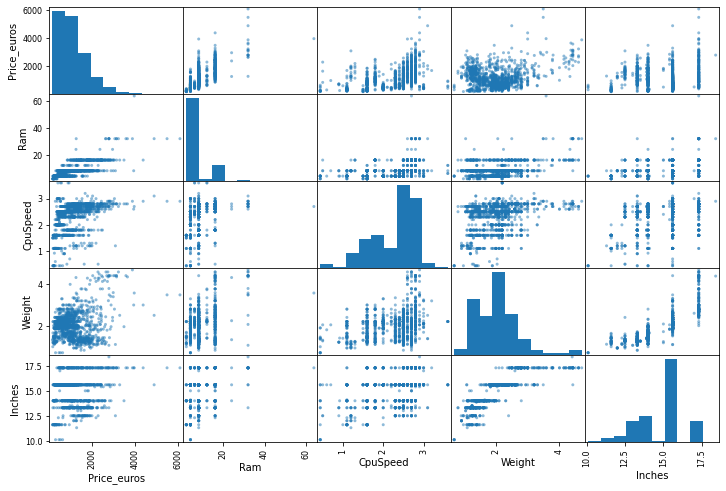

In [96]:
from pandas.plotting import scatter_matrix
att=['Price_euros','Ram','CpuSpeed','Weight','Inches']
scatter_matrix(df[att],figsize=(12,8))

In [97]:
from sklearn.model_selection import train_test_split
train_set,test_set = train_test_split(df,test_size=0.2)

We do expect the lines to exist, this is because there is only certian values for each ram, cpu speed etc

## Single Varible Regression
First I will look into only using one varible

In [104]:
from sklearn.linear_model import LinearRegression
import numpy as np
lin=LinearRegression()
train_x = np.asanyarray(train_set['CpuSpeed'])
train_y = np.asanyarray(train_set['Price_euros'])
lin.fit(train_x.reshape(-1, 1),train_y)

LinearRegression()

In [109]:
ypre=lin.predict(np.asanyarray(test_set['CpuSpeed']).reshape(-1, 1))

### Evaluating the model
There are a number of evaluation tools for regression. These are
*   Mean Absolute Error: It is the mean of the absolute value of the errors. This is the easiest of the metrics to understand since it’s just average error.

*   Mean Squared Error (MSE): Mean Squared Error (MSE) is the mean of the squared error. It’s more popular than Mean Absolute Error because the focus is geared more towards large errors. This is due to the squared term exponentially increasing larger errors in comparison to smaller ones.

*   Root Mean Squared Error (RMSE).

*   R-squared is not an error, but rather a popular metric to measure the performance of your regression model. It represents how close the data points are to the fitted regression line. The higher the R-squared value, the better the model fits your data. The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).

In [111]:
from sklearn.metrics import mean_squared_error
rmse=np.sqrt(mean_squared_error(test_set['Price_euros'],ypre))
rmse

587.6961224451464

In [113]:
from sklearn.metrics import r2_score

print("Mean absolute error: %.2f" % np.mean(np.absolute(ypre - test_set['Price_euros'])))
print("Residual sum of squares (MSE): %.2f" % np.mean((ypre - test_set['Price_euros']) ** 2))
print("R2-score: %.2f" % r2_score(test_set['Price_euros'] , ypre) )
print("RMSE error is: %.2f" % rmse)

Mean absolute error: 471.91
Residual sum of squares (MSE): 345386.73
R2-score: 0.18
RMSE error is: 587.70


## Multiple Varible Regression

In [116]:
train_x = np.asanyarray(train_set[['CpuSpeed','Ram','Weight']])
train_y = np.asanyarray(train_set['Price_euros'])
lin.fit(train_x,train_y)

LinearRegression()

In [117]:
ymul=lin.predict(np.asanyarray(test_set[['CpuSpeed','Ram','Weight']]))

### Evaluating the model
This will use the same predictions as before 

In [118]:
rmse=np.sqrt(mean_squared_error(test_set['Price_euros'],ymul))
rmse
print("Mean absolute error: %.2f" % np.mean(np.absolute(ymul - test_set['Price_euros'])))
print("Residual sum of squares (MSE): %.2f" % np.mean((ymul - test_set['Price_euros']) ** 2))
print("R2-score: %.2f" % r2_score(test_set['Price_euros'] , ymul) )
print("RMSE error is: %.2f" % rmse)

Mean absolute error: 314.18
Residual sum of squares (MSE): 179013.97
R2-score: 0.58
RMSE error is: 423.10


## Conclusion

This shows that a single variable regression for predicting price is not enough to predict it will any accuracy. Increasing it to use more variables we get a much better estimate for price.